# Physics 760: Computational Physics
## WS 2022/23
### Week 2
#### Pugazharasu Anancia Devaneyan, Rishi Kumar Senthil Kumar

In [1]:
#setup the notebook
%pylab inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math as mth
from scipy import special

Populating the interactive namespace from numpy and matplotlib


# Simulating the Ising model in $d=2$ using the Metropolis-Hasting algorithm

First we define what energy difference i.e. $\Delta S$ that was defined in the lecture to be numerically.

In [2]:
def deltaE(S0, Sn, J, H):  
    return 2 * S0 * (H + J * Sn)

Now we implement Metropolis-Hastings algorithm as detailled in the lecture.

In [9]:
def accept_reject(sweeps, N, beta, J, h, freq=10):
    
    
    spin_list = 2*np.random.randint(2, size=(N,N)) - 1
    final_config = spin_list
    for i in range(sweeps):
        spin_flip_i = np.random.randint(N)
        spin_flip_j = np.random.randint(N)
        
        Sn = spin_list[(spin_flip_i - 1) % N, spin_flip_j] + spin_list[(spin_flip_i + 1) % N, spin_flip_j] + \
             spin_list[spin_flip_i, (spin_flip_j - 1) % N] + spin_list[spin_flip_i, (spin_flip_j + 1) % N]

        change_E = deltaE(spin_list[spin_flip_i,spin_flip_j],Sn,J,h)
        
        rand = np.random.random()
        
        #Check if 
        if rand<min(1,np.exp(-beta*(change_E))) :
            #flip the spin
            spin_list[spin_flip_i,spin_flip_j]*=-1
        else:
            pass
    
    return spin_list

## Magnetization

In [10]:
def exact_magnetization(J_coup,h_coup,Temp,N_sites):
    beta = 1/Temp
    sin_term = np.sinh(h_coup*beta)
    cosine_term = np.cosh(h_coup*beta)
    lambda_plus = (np.exp(J_coup*beta))*(cosine_term + np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp)))
    lambda_minus = (np.exp(J_coup*beta))*(cosine_term - np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp)))
    ratio = (lambda_minus/lambda_plus)**N_sites
    mag = (sin_term/(np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp))))*((1-ratio)/(1+ratio))
    return mag

We can calculate the magnetization at the thermodynamic limit by taking the limit $\lim_{N \rightarrow \infty}$ for the previous expression.

In [11]:
def thermo_magnetization(J_coup,h_coup,Temp):
    sine_term = mth.sin(h_coup/Temp)
    cosine_term = mth.cos(h_coup/Temp)
    exp_term = mth.exp(-4*(J_coup/Temp))
    mag = (sine_term + ((sine_term * cosine_term)/(mth.sqrt((sine_term**2)+exp_term))))/(cosine_term + mth.sqrt((sine_term**2)+exp_term))
    return mag

In [55]:
def numerical_mag(lattice, N):
    mag = 0
    for i in range(N):
        for j in range(N):
            mag += lattice[i,j]
    mag = mag/(N)
    return mag

In [281]:
h_input = np.linspace(-1,1,100)
h_fixed = 0.5
N_fixed = 14
N_input = [2,3,4,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Temp_set = 0.75
J_input_1 = np.linspace(0.25,2,100)
J_input_2 = np.linspace(0.25,1,100)
J_fixed = 0.5
sweeps = N_fixed*100
beta = 1/Temp_set

In [282]:
m_thermo_1 = []
m_exact_1 = []
for i in h_input:
    m_thermo_1.append(thermo_magnetization(J_fixed,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(J_fixed,i,Temp_set,N_fixed))

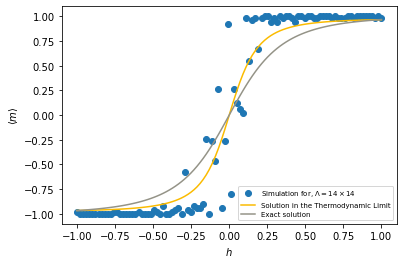

In [283]:
m_vs_h = []
for h in h_input:
   m_h = accept_reject(sweeps, N_fixed, beta, J_fixed,h)
   mean_m = np.mean(m_h[len(m_h)//2:])
   m_vs_h.append(mean_m)

plt.plot(h_input,m_vs_h,marker='o',label='Simulation for, $\\Lambda = 14 \\times 14$',linestyle='')
plt.plot(h_input, m_thermo_1, color ='#fbbb00', label='Solution in the Thermodynamic Limit')
plt.plot(h_input, m_exact_1, color = '#949387', label='Exact solution')

plt.xlabel('$h$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('m_v_h_14.png')

### Absolute Magnetization

In [39]:
def numerical_abs_mag(lattice, J,N):
    mag_sum = 0
    if J > 0.440686793509772:
        for i in range(N):
            for j in range(N):
                mag_sum += np.absolute(lattice[i,j])
        mag_sum = mag_sum/(N*N)
        return mag_sum
    else:
        return 0

In [17]:
def mag_absolute_exact(J):
    if J > 0.440686793509772:
        absolute_exact_mag = (1- (1/(np.sinh(2*J)**4)))**(1/8)
        return absolute_exact_mag
    else:
        return 0

In [226]:
m_absolute_1 = []
for j in J_input_2:
    m_absolute_1.append(mag_absolute_exact(j))
    
m_abs_vs_h = []
for j in J_input_2:
   m_a_h = numerical_abs_mag(accept_reject(sweeps, N_fixed, beta, j,0),j,N_fixed)
   m_abs_vs_h.append(m_a_h)

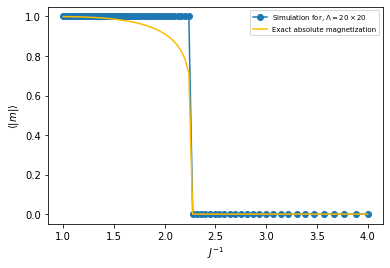

In [232]:
plt.plot(np.reciprocal(J_input_2),m_abs_vs_h,'o-',label='Simulation for, $\\Lambda = 20 \\times 20$')
plt.plot(np.reciprocal(J_input_2), m_absolute_1, color ='#fbbb00', label='Exact absolute magnetization')

plt.xlabel('$J^{-1}$')
plt.ylabel('$\\langle | m |\\rangle$')
plt.legend(loc='upper right',prop={'size': 7})
plt.savefig('abs_m_v_J_20.png')

In [230]:
m_absolute_2 = []
for j in J_input_2:
   m_a_h_2 = accept_reject(sweeps, N_fixed, beta, j,0)
   mean_m_2 = np.mean(m_h[len(m_h)//2:])
   m_absolute_2.append(mean_m_2)
   
m_thermo_2 = []
m_exact_2 = []
for j in J_input_2:
    m_thermo_1.append(thermo_magnetization(j,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(j,i,Temp_set,N_fixed))

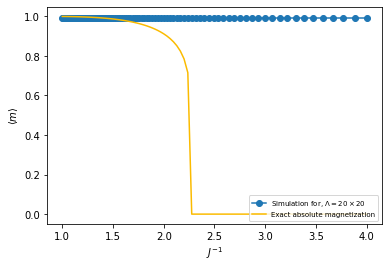

In [231]:
plt.plot(np.reciprocal(J_input_2),m_absolute_2,'o-',label='Simulation for, $\\Lambda = 20 \\times 20$')
plt.plot(np.reciprocal(J_input_2), m_absolute_1, color ='#fbbb00', label='Exact absolute magnetization')

plt.xlabel('$J^{-1}$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('m_v_j_20.png')

## Energy

In [94]:
def energy_exact(J):
    exact_energy = (-J*(1/np.tanh(2*J)))*(1 + (2/np.pi)*((2*(np.tanh(2*J)**2)-1)*(sp.special.ellipkm1(4*((1/np.cosh(2*J))**2)*(np.tanh(2*J)**2)))))
    return exact_energy

In [150]:
def energy_numeric(config,N,J,H):
    e_out = 0 
    
    for i in range(N):
        for j in range(N):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            #e_out = e_out + (-2*nb*S)
            e_out += -deltaE(S, nb, J, H)
    e_out = e_out/(N**2)
    return e_out/2.

In [151]:
e_num = []
for j in J_input_2:
   numeric_e = energy_numeric(accept_reject(sweeps, N_fixed, beta, j,0),N_fixed, j, 0)
   e_num.append(numeric_e)
   
e_exact = []
for j in J_input_2:
    e_exact.append(energy_exact(j))

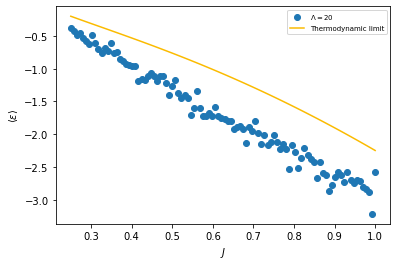

In [249]:
plt.plot(J_input_2,e_num,'o',label='$\\Lambda = 20$')
plt.plot(J_input_2, e_exact, color ='#fbbb00', label='Thermodynamic limit')

plt.xlabel('$J$')
plt.ylabel('$\\langle \\epsilon \\rangle$')
plt.legend(loc='upper right',prop={'size': 7})
plt.savefig('e_v_j_20.png')

## Specific Heat

In [194]:
def energy_numeric_square(config,N,J,H):
    e_out = 0 
    for i in range(N):
       for j in range(N):
           S = config[i,j]
           nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
           e_out += (deltaE(S, nb, J, H)**2)
    e_out = e_out/(N**2)
    return e_out/2

In [245]:
def heat_exact(J):
    k = (2*np.sinh(2*J))/(np.cosh(2*J)**2)
    first_term = sp.special.ellipkm1(k**2) - sp.special.ellipe(k**2) - (1- (np.tanh(2*J)**2))
    second_term = (np.pi/2) + ((2*(np.tanh(2*J)**2))- 1)*(sp.special.ellipkm1(k**2))
    exact_heat = ((4)/(np.pi*(np.tanh(2*J)**2))) * first_term * second_term
    return exact_heat

In [255]:
def heat_numeric(config,N,J,h):
    heat = ((energy_numeric_square(config,N,J,h) - (energy_numeric(config,N,J,h)**2))/(J**2))
    return heat

In [256]:
c_numeric = []
c_vs_J_exact = []
for j in J_input_2:
    c_j = accept_reject(sweeps, N_fixed, beta, j,0)
    c_numeric.append(heat_numeric(c_j,N_fixed,j,0))
    c_vs_J_exact.append(heat_exact(j))

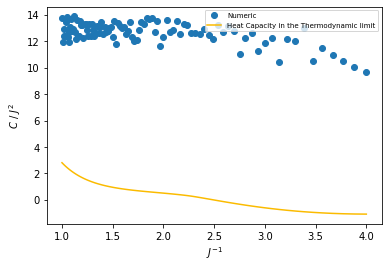

In [257]:
plt.plot(np.reciprocal(J_input_2), c_numeric, marker='o',label="Numeric",linestyle='')
plt.plot(np.reciprocal(J_input_2), c_vs_J_exact, color ='#fbbb00', label='Heat Capacity in the Thermodynamic limit')

plt.xlabel('$J^{-1}$')
plt.ylabel('$C \ / \ J^{2}$')
plt.legend(loc='upper right',prop={'size': 7})
plt.savefig('c_v_j_20.png')